Suppose $X\sim Exp(1)$ want to estimate $E(e^{-X+cosX})$

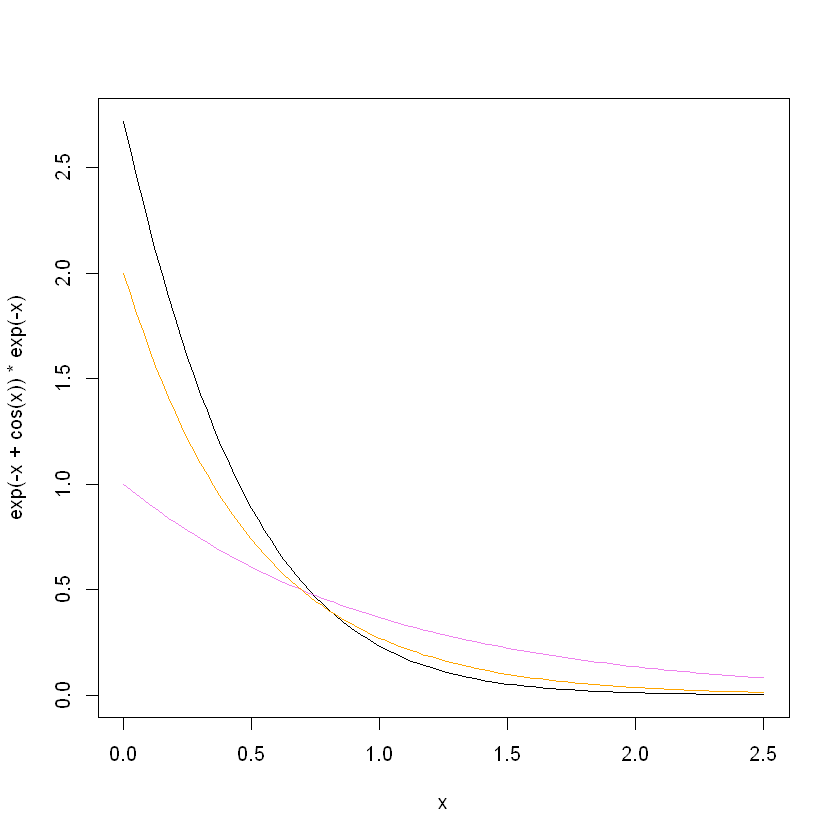

In [2]:
curve(exp(-x + cos(x)) * exp(-x), 0, 2.5, n = 101)
curve(exp(-x), 0, 2.5, add = TRUE, col = "violet")
curve(2*exp(-2*x), 0, 2.5, add=TRUE, col="orange")

# Importance sampling

In [4]:
n = 1000
X = rexp(n, rate=2)
weights = rep(NA, n)
mu = rep(NA, n)

for (i in 1:n){
    weights[i] = dexp(X[i])/dexp(X[i], rate=2)
    mu[i] = weights[i]*exp((-1*X[i])+cos(X[i]))
}

mean(mu)
sqrt(var(mu)/n)

[1] 1.167239

[1] 0.008231674

# Naive MC

In [5]:
X = rexp(n, 1)
mean(exp(-1*X+cos(X)))
sqrt(var(exp(-1*X+cos(X)))/n)

[1] 1.15808

[1] 0.02777191

## Classwork

Goal: find importance sampling estimator for 

$$= \int_{0}^1 \frac{e^{-x}}{1+x^2} dx$$

$$h(x) = \frac{e^{-x}}{1+x^2}$$

$$\pi (x) \text{ as } U(0,1)$$
proposal functions:

1. $g(x)=1 \text{ for } 0<x<1$
2. $g(x)=e^{-x} \text{ for } 0<x< \infty$
3. $g(x) = \frac{e^{-x}}{1-e^{-1}}\text{ for } 0<x<1$
4. $g(x) = \frac{4}{\pi (1+x^2)} \text{ for } 0<x<1$

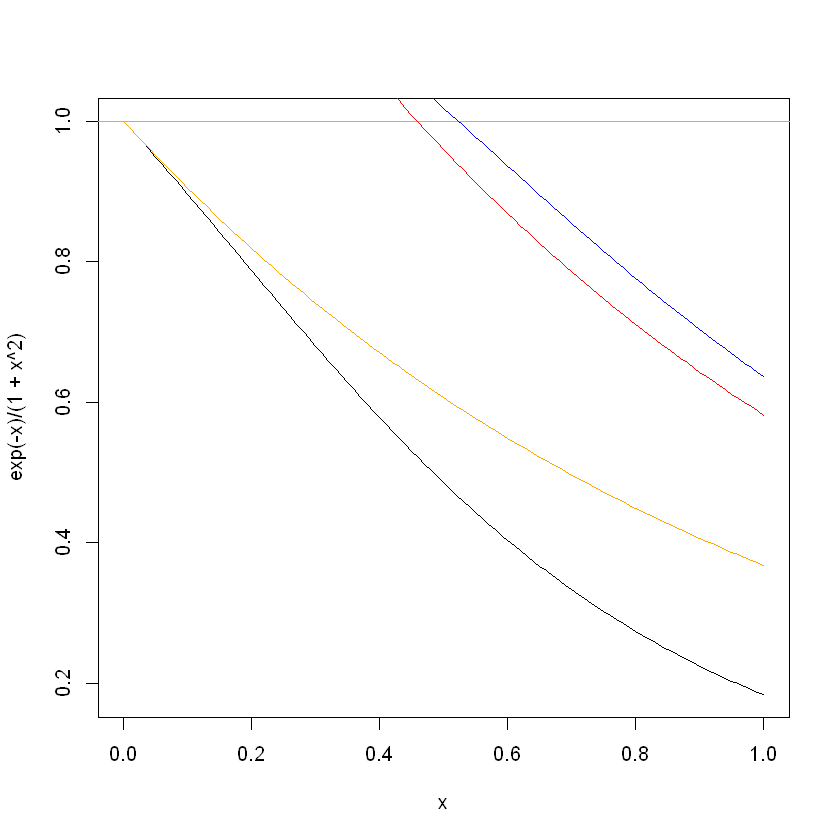

In [3]:
curve(exp(-x)/(1+x^2), 0, 1, n = 101)
abline(h=1, col="violet")
curve(exp(-1*x), 0, 1, add=TRUE, col="orange")
curve(exp(-1*x)/(1-exp(-1)), 0, 1, add=TRUE, col="red")
curve(4/(pi*(1+x^2)), 0, 1, add=TRUE, col="blue")

In [5]:
h_x = function(x){
    return (exp(-1*x)/(1+x^2))
}

pi_x = function(x){
    return (dunif(x, 0, 1))
}

g_x1 = function(x){
    return(1)
}

g_x2 = function(x){
    return(exp(-1*x))
}

g_x3 = function(x){
    return(exp(-1*x)/(1-exp(-1)))
}

g_x4 = function(x){
    
}


1. $g(x)=1 \text{ for } 0<x<1$

In [8]:
n = 1000
X = runif(n)
weights = rep(NA, n)
mu = rep(NA, n)

for (i in 1:n){
    weights[i] = dunif(X[i], 0, 1)/ dunif(X[i], 0, 1)
    mu[i] = weights[i]*h_x(X[i])
}

mean(mu)
sqrt(var(mu)/n)

[1] 0.5164292

[1] 0.007710286

2. $g(x)=e^{-x} \text{ for } 0<x< \infty$

In [9]:
n = 1000
X = rexp(n)
weights = rep(NA, n)
mu = rep(NA, n)

for (i in 1:n){
    weights[i] = dunif(X[i], 0, 1)/ dexp(X[i])
    mu[i] = weights[i]*h_x(X[i])
}

mean(mu)
sqrt(var(mu)/n)

[1] 0.5251582

[1] 0.01326081

3. $g(x) = \frac{e^{-x}}{1-e^{-1}}\text{ for } 0<x<1$

need to renormalize the exponential find k so $k\int_{0} ^1 e^{-x}$ or inverse

inverse sampling:

1. find cdf

cdf = $\int_{0}^{x} \frac{e^{-s}}{1-e^{-1}} ds = \frac{e^{-s}}{e^{-1}-1}|_0 ^x = \frac{e^{-x}}{e^{-1}-1} - \frac{1}{e^{-1}-1}$

2. find inverse 

$$ y = \frac{e^{-x}}{e^{-1}-1} - \frac{1}{e^{-1}-1} $$

$$ y + \frac{1}{e^{-1}-1} = \frac{e^{-x}}{e^{-1}-1}$$

$$log(y)+log(\frac{1}{e^{-1}-1} ) = log(e^{-x}) - log(e^{-1}-1) = -x $$

$$x = log(\frac{y}{e^{-1}-1} )$$

3. sample from uniform

4. plug into inverse cdf

In [17]:
inverse_cdf = function(u){
    return(log(u/(exp(-1)-1)))
}

In [18]:
n = 1000
u = runif(n)
X = inverse_cdf(u)
weights = rep(NA, n)
mu = rep(NA, n)

for (i in 1:n){
    weights[i] = dunif(X[i], 0, 1)/ u[i]
    mu[i] = weights[i]*h_x(X[i])
}

mean(mu)
sqrt(var(mu)/n)

Warning message in log(u/(exp(-1) - 1)):
"NaNs produced"


[1] NaN

[1] NA